## Effect Of Temperature On Pace

---

It's starting to get hot out in Baltimore, and today I noticed that my percieved exertion is going up. I encountered the same issue last year, and I roughly estimate that a 10 degree temperature difference took off around 15 seconds of pace on average. I want to try to test that relation though. Doing this will help me understand how much effort I should be putting in to my runs over the summer. This summer I'm hoping to focus less on pace and more on heart rate training. 

Pace is informed by a number of factors, so isolating the specific relationship between temperature and pace isn't going to be easy. Fortunately this is more or less a heuristic exercise, I'm not trying to write a paper here. That means that the only confounding variables I'm going to try and control for are distance run and some measure of the steepness of the route. I have the GPS data from my run, but as of 4-12-23 I'm not quite prepared to delve into it yet, so as a placeholder I'll be constructing a  "hillyness metric" defined as $$\text{Hilly Metric} = \sqrt{\text{Elevation Gained}^2 + \text{Elevation Lost}^2}$$ obviously this method isn't perfect, if I were cooler I'd integrate over the GPS data, but I think it should be a reasonable-accuracy low-effort solution.

**Problem:** I need to try and disentangle distance and hilly metric from the equation, but if I want to calculate their covariances, I need to take into account the fact that there's a non-gaussian probability distribution. For example, it's highly improbable that on any given day while training for a 26.2 mile race I would have run over ~20 miles, whereas it's fairly likely that I would have run 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

In [11]:
dat = pd.read_csv('strava2022/activities.csv')
dat = dat[dat['Activity Type'] == 'Run']
dat = dat.iloc[44:136]

dat.reset_index(drop=True, inplace=True)
dat['Activity Date']

0     2022-04-05 10:40:30
1     2022-04-06 12:19:26
2     2022-04-09 15:49:16
3     2022-04-19 10:41:46
4     2022-04-20 12:00:02
             ...         
87    2022-10-05 21:22:37
88    2022-10-06 20:54:33
89    2022-10-08 17:19:51
90    2022-10-11 17:24:12
91    2022-10-15 12:01:31
Name: Activity Date, Length: 92, dtype: object

In [12]:
dat['Activity Date'] = pd.to_datetime(dat['Activity Date'], format="%Y-%m-%d %H:%M:%S")
dat['Distance'] = dat['Distance'] * 0.621371 # Converting from km to mi
dat['Average Temperature'] = (dat['Average Temperature'] * 9 / 5) + 32 # Converting from C to F
dat['Average Pace'] = (dat['Average Speed'] * 60 * 0.000621371)**-1 # Converting from m/s to min/mi


dat.sort_values(by='Activity Date', inplace = True)

26.414481209999998


Text(0, 0.5, 'Temperature [F]')

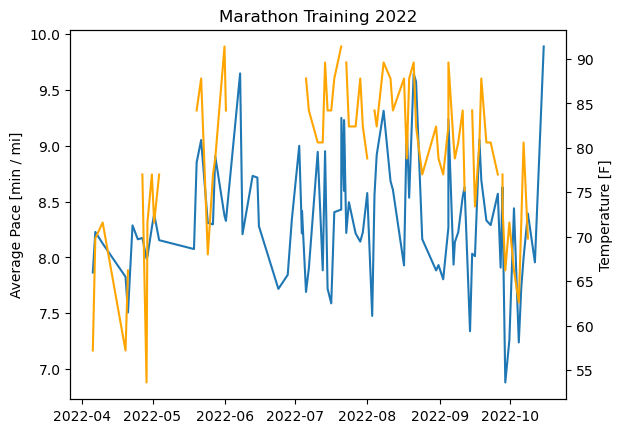

In [13]:
print(max(dat['Distance']))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(dat['Activity Date'], dat['Average Pace'])
ax2.plot(dat['Activity Date'], dat['Average Temperature'], color = 'orange')
#ax1.xticks(rotation=90)

ax1.set_title('Marathon Training 2022')
ax1.set_ylabel(r'Average Pace [min / mi]')
ax2.set_ylabel(r'Temperature [F]')

In [16]:
dat['elevation_norm'] = np.sqrt((dat['Elevation Gain'] * 3.28084)**2 + (dat['Elevation Loss'] * 3.28084)**2)

#plt.hist(dat['elevation norm'])
#plt.hist(dat['Distance'])

In [22]:
cov_elev_pace = 0
cov_dist_pace = 0

elev_count = 0
dist_count = 0

for i in range(len(dat)):
    if (~np.isnan(dat['elevation_norm'][i])):
        cov_elev_pace += (dat['elevation_norm'][i] - np.mean(dat['elevation_norm'])) * (dat['Average Pace'][i] - np.mean(dat['Average Pace']))
        elev_count += 1
        
    if (~np.isnan(dat['Distance'][i])):
        cov_dist_pace += (dat['Distance'][i] - np.mean(dat['Distance'])) * (dat['Average Pace'][i] - np.mean(dat['Average Pace']))
        dist_count += 1
    
cov_elev_pace = cov_elev_pace / elev_count
cov_dist_pace = cov_dist_pace / dist_count

print(elev_count)

print(cov_elev_pace)
print(cov_dist_pace)

86
30.520003005981188
0.6102996854785553


In [ ]:
plt.scatter(dat['Average Temperature'], dat['Average Pace'])

plt.xlabel('Temperature [F]')
plt.ylabel('Pace [min/mi]')